### Визуализация решающих поверхностей в kNN.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


In [ ]:
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [ ]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

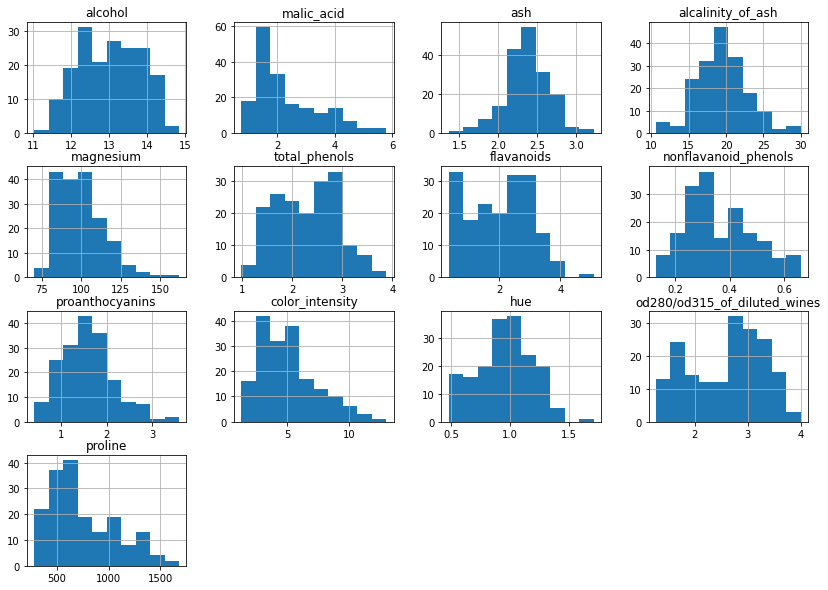

In [ ]:
X.hist( figsize=(14, 10))
None

Пропущенных признаков и категориальных переменных нет

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [ ]:
X_train.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.727963,0.166220,1.165663,1.349859,0.411548,-1.140471,-1.123546,0.123110,-0.060826,1.446494,-0.897802,-1.095335,0.060602
1,-0.715013,0.055269,0.343791,0.334188,-0.093719,0.532433,0.162513,-0.280744,-0.466145,-0.924328,-0.652731,1.134024,-0.913864
2,-0.121531,0.755115,0.772594,0.624380,0.483729,-0.974836,-1.366581,1.819299,-1.082933,0.200396,-0.366815,-0.657930,-0.501590


In [ ]:
from sklearn.metrics import accuracy_score
res=list()
clfs=list()
for n in [1, 3, 5, 10, 15, 25]:
  clf = KNeighborsClassifier(n_neighbors=n,metric="euclidean")
  clf.fit(X_train[['alcohol', 'magnesium']],y_train)
  clfs.append(clf)
  train_pred = clf.predict(X_train[['alcohol', 'magnesium']])
  test_pred = clf.predict(X_test[['alcohol', 'magnesium']])
  acc1 = accuracy_score(y_train, train_pred)
  acc2 = accuracy_score(y_test, test_pred)
  res.append([n, acc1,acc2])
pd.DataFrame(res, columns=['NN', 'Train', 'Test'])

,NN,Train,Test
0,1,0.991935,0.703704
1,3,0.846774,0.740741
2,5,0.822581,0.722222
3,10,0.782258,0.722222
4,15,0.758065,0.722222
5,25,0.741935,0.722222


In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


0 0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0 1


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0 2


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1 0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1 1


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1 2


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


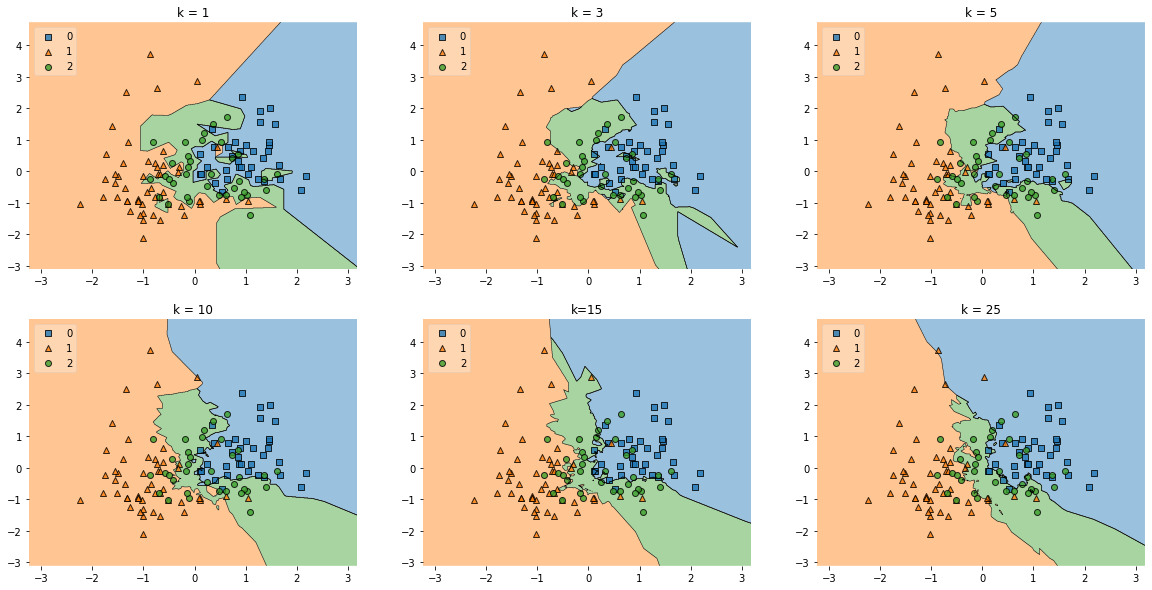

In [ ]:
from mlxtend.plotting import plot_decision_regions
import itertools
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(20,10))

labels = ['k = 1', 'k = 3', 'k = 5',
          'k = 10', 'k=15', 'k = 25']
gs = GridSpec(2, 3)

for clf, label, grd in zip(clfs,labels, itertools.product([0, 1, 2], repeat=2)):
    print(grd[0], grd[1])
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train[['alcohol', 'magnesium']].values, y=y_train, clf=clf, legend=2)
    plt.title(label)

plt.show()

Исходя из графиков и обучения моделей оптимальное число соседей 5, тк решающая поверхность хорошо аппроксимирует расположение классов ( лучше чем модели на 10, 15, 25) и при этом обладает наименьшим количество артефактов (выступы, отклонения, отдельные пятна) как в классификаторах на 1 и 3
( по качеству обучения сказать сложнее, нужно найти баланс и лучше провести кросс-валидацию)

### KNN своими руками

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

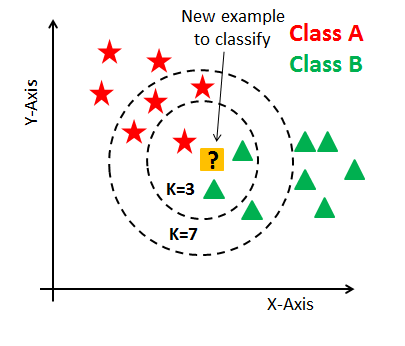

In [ ]:
import numpy as np
from collections import Counter 

class KNN:
    X_train = np.array(2,)
    y_train = np.ndarray(1,)
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
      self.X_train = X
      self.y_train = y
    def euclidean_distance(X, y):
      return np.sqrt(np.sum((X - y) ** 2, axis=1))
    
    def predict(self, X):
      ans = list()
      for vec in X:
          ans.append((np.sqrt(np.sum((self.X_train - vec) ** 2, axis=1))).argsort()[:self.k])
      prediction = list()
      for i in ans:
          prediction.append(np.bincount(self.y_train[i]).argmax())
          
      return np.array(prediction)

In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Линейная регрессия.

In [ ]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
# судя по всему unnamed 0 - просто столбец индексации
data.drop('Unnamed: 0', axis=1, inplace=True)


In [ ]:
data.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [ ]:
data.loc[:].corrwith(data.price)

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
dtype: float64

In [ ]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-21-96612fe94b20>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,carat,depth,table,price,x,y,z
carat,1.00,0.03,0.18,0.92,0.98,0.95,0.95
depth,0.03,1.00,-0.30,-0.01,-0.03,-0.03,0.09
table,0.18,-0.30,1.00,0.13,0.20,0.18,0.15
price,0.92,-0.01,0.13,1.00,0.88,0.87,0.86
x,0.98,-0.03,0.20,0.88,1.00,0.97,0.97
y,0.95,-0.03,0.18,0.87,0.97,1.00,0.95
z,0.95,0.09,0.15,0.86,0.97,0.95,1.00


In [ ]:
data = pd.get_dummies(data, columns=data.loc[:, data.dtypes == 'object'].columns,drop_first=True)
data.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = data.drop('price', axis=1)
y = data['price']
np.random.seed(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

rg = LinearRegression()
rg.fit(X_train, y_train)
pred_train = rg.predict(X_train)
pred_test = rg.predict(X_test)
print(mean_squared_error(pred_train,y_train, squared=False))
print(mean_squared_error(pred_test,y_test, squared=False))

1129.7918735928931
1132.8232061526742


In [ ]:
y_train.describe()

count    37758.000000
mean      3949.503390
std       4002.656832
min        326.000000
25%        950.250000
50%       2401.000000
75%       5373.000000
max      18823.000000
Name: price, dtype: float64

In [ ]:
rg.coef_

array([ 5.33602429e+03, -8.86368418e+01, -5.47000487e+01, -1.09157431e+03,
        2.36227698e+00, -5.24195184e+01,  1.77080028e+02,  4.27257529e+02,
        3.44385600e+02,  3.13377099e+02, -6.94933649e+01, -9.67253027e+01,
       -1.87871675e+02, -3.44255358e+02, -4.40766227e+02, -5.20415834e+02,
        9.58868084e+02,  1.56763688e+03,  1.01417026e+03,  1.63947549e+03,
        1.78330224e+03,  1.25052002e+03,  1.44806600e+03])

In [ ]:
print(X_train.columns[0:6])
rg.coef_[0:6]
# самые важные(большие веса) из вещественных переменных у каратов и x

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')


array([ 5.33602429e+03, -8.86368418e+01, -5.47000487e+01, -1.09157431e+03,
        2.36227698e+00, -5.24195184e+01])

In [ ]:
from sklearn.linear_model import Lasso, Ridge 
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

print(lasso.coef_[0:6])
print(ridge.coef_[0:6])
print(rg.coef_[0:6])
# Веса уменьшились незначительно => можно сделать вывод, что в данной задаче мультиколлинеарность не являлась серьезной проблемой

[4851.68977534  -93.73894575  -64.9925954  -643.27912477   -0.
  -58.42610495]
[ 5.29784315e+03 -8.54519530e+01 -5.48879820e+01 -1.04042316e+03
  1.70908849e+00 -6.67964228e+01]
[ 5.33602429e+03 -8.86368418e+01 -5.47000487e+01 -1.09157431e+03
  2.36227698e+00 -5.24195184e+01]


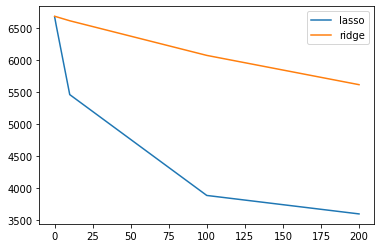

In [ ]:
l =list()
r =list()
for a in [0.1,1,10,100,200]:
  lasso = Lasso(alpha=a)
  lasso.fit(X_train, y_train)

  ridge = Ridge(alpha=a)
  ridge.fit(X_train, y_train) 
  l.append(np.linalg.norm(lasso.coef_))
  r.append(np.linalg.norm(ridge.coef_))

plt.plot([0.1,1,10,100,200], l, label='lasso')
plt.plot([0.1,1,10,100,200], r, label='ridge')
plt.legend()
plt.show()
# Лассо регрессия сильнее понижает веса тк вероятнее устремляет  значимость признаков близкую к нулю в ноль
# Поэтому Лассо регрессию часто используют для отбора информативных признаков 

In [ ]:
from sklearn.linear_model import LassoCV

alphas = np.linspace(0.1, 100, 2000)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)
lasso_cv

LassoCV(alphas=array([  0.1       ,   0.14997499,   0.19994997, ...,  99.90005003,
        99.95002501, 100.        ]),
        cv=5)

In [ ]:
lasso_cv.mse_path_.mean(axis=1)

array([1795139.37334626, 1795012.87086472, 1794855.07490856, ...,
       1281462.21451895, 1281541.65158157, 1281626.18865393])

In [ ]:
lasso_cv.alphas_[lasso_cv.mse_path_.mean(axis=1).argmin()]

0.89959979989995

In [ ]:
ls = Lasso(alpha=0.899)
ls.fit(X_train, y_train)
pred_train = ls.predict(X_train)
pred_test = ls.predict(X_test)
print(mean_squared_error(pred_train,y_train, squared=False))
print(mean_squared_error(pred_test,y_test, squared=False))

1129.9995588766037
1133.0126655327285


In [ ]:
for col, coef in zip(X_train.columns, ls.coef_):
    print(col,": ", coef)

carat :  5294.015675012092
depth :  -89.76974636873129
table :  -55.62891077541837
x :  -1055.4111434619526
y :  -0.0
z :  -48.27356655750525
cut_Good :  166.1575071694398
cut_Ideal :  409.43847524879925
cut_Premium :  328.1130784735124
cut_Very Good :  298.59268009016756
color_E :  -63.19869097500817
color_F :  -90.76717033941
color_G :  -180.9601004009205
color_H :  -337.6693605275268
color_I :  -434.4192957729633
color_J :  -515.1552657540482
clarity_IF :  931.2904024181853
clarity_SI1 :  1504.0646823737197
clarity_SI2 :  958.7737090610855
clarity_VS1 :  1585.5261528066064
clarity_VS2 :  1721.2864482589887
clarity_VVS1 :  1212.9539838131511
clarity_VVS2 :  1404.1605521336962


In [ ]:
print(mean_squared_error(y_test, rg.predict(X_test), squared=False),
     mean_squared_error(y_test, pred_test, squared=False))

1132.8232061526742 1133.0126655327285
